In [2]:
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [24]:
import pandas as pd
output_path = '/Users/Hesham/dev/fluffDecoder/data/'
p = pd.read_csv(output_path + 'ST1814523348_1.0.csv')

In [25]:
p = p.drop(['date', 'window'], axis=1).astype(float)


In [26]:
p.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,mood,tense,tired,rumination,socialize,socialize_val,work_time,day_sleep,phq_1,phq_2
0,1.542356e+09,7.24,5.79,3.19,2.39,2.15,2.39,-0.21,30.36,0.14,...,4.0,4.0,1.0,2.0,50.0,49.0,60.0,0.0,6.0,6.0
1,1.542356e+09,-0.03,0.30,-0.03,0.21,9.92,0.21,-0.07,5.93,0.14,...,4.0,4.0,1.0,2.0,50.0,49.0,60.0,0.0,6.0,6.0
2,1.542356e+09,-0.02,0.03,-0.03,0.04,9.93,0.04,-0.14,0.14,0.14,...,4.0,4.0,1.0,2.0,50.0,49.0,60.0,0.0,6.0,6.0
3,1.542356e+09,-0.03,0.03,-0.03,0.04,9.92,0.04,-0.21,0.12,0.14,...,4.0,4.0,1.0,2.0,50.0,49.0,60.0,0.0,6.0,6.0
4,1.542356e+09,-0.03,0.05,-0.03,0.04,9.91,0.04,-0.28,0.11,0.14,...,4.0,4.0,1.0,2.0,50.0,49.0,60.0,0.0,6.0,6.0


In [7]:
# y = p[['phq_1']]
# t1, t2 = train_test_split(p, stratify=y, test_size=0.5, random_state=42, shuffle=True)

In [8]:
len(t1.index)

83127

In [9]:
# train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [27]:
y = p[['phq_1']]
train_set_st, test_set_st = train_test_split(p, stratify=y, test_size=0.25, random_state=42, shuffle=True)

In [28]:
train_set_st.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,mood,tense,tired,rumination,socialize,socialize_val,work_time,day_sleep,phq_1,phq_2
81804,1.553096e+09,-5.40,3.43,-6.41,3.48,2.47,3.48,-0.84,97.90,-0.11,...,5.0,5.0,1.0,1.0,15.0,46.0,0.0,0.0,5.0,5.0
41754,1.547594e+09,0.49,5.98,-5.95,4.17,1.96,4.17,4.48,98.39,-0.63,...,5.0,5.0,1.0,1.0,44.0,49.0,60.0,0.0,6.0,6.0
114962,1.559055e+09,-7.90,4.89,-2.69,4.31,0.16,4.31,0.35,38.66,1.96,...,5.0,5.0,1.0,1.0,47.0,45.0,60.0,0.0,5.0,5.0
116790,1.559308e+09,0.42,0.70,-3.60,1.54,9.16,1.54,-0.21,12.90,-0.07,...,5.0,5.0,1.0,1.0,51.0,50.0,0.0,0.0,5.0,5.0
99526,1.556638e+09,3.89,0.83,-8.63,1.28,3.13,1.28,-0.14,14.62,0.21,...,5.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0


In [29]:
X_train_st = train_set_st.loc[:,'accX':'work_time']
y_train_st_1 = train_set_st.loc[:, ['phq_1']].values.ravel()
# y_train_st_2 = train_set_st.loc[:, ['phq_2']].values.ravel()

X_test_st = test_set_st.loc[:,'accX':'work_time']
y_test_st_1 = test_set_st[['phq_1']].values.ravel()
# y_test_st_2 = test_set_st[['phq_2']].values.ravel()

In [59]:
X_train_st.columns

Index(['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX',
       'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'PlethysmogramGreen',
       'ple_std', 'mood', 'tense', 'tired', 'rumination', 'socialize',
       'socialize_val', 'work_time'],
      dtype='object')

In [30]:
time_st = train_set_st[['time']].values.ravel()
time_st_test = test_set_st[['time']].values.ravel()

In [31]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler_st = StandardScaler()
X_train_st_scaled = scaler_st.fit_transform(X_train_st)
X_test_st_scaled = scaler_st.transform(X_test_st)

In [15]:
parameters = {'epsilon':[0,0.1,0.2,0.5,1],
               'tol':[1e-1, 1e-3,1e-5],
              'C':[1, 1.5, 10, 50]
              }

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

svr = LinearSVR(random_state=42)
regressor_st = GridSearchCV(svr, parameters, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error')
regressor_st

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [17]:
regressor_st.fit(X_train_st_scaled, y_train_st_1)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [18]:
regressor_st.best_params_

{'C': 1.5, 'epsilon': 0, 'tol': 1e-05}

In [19]:
regressor_st.best_estimator_

LinearSVR(C=1.5, dual=True, epsilon=0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=1e-05, verbose=0)

In [20]:
from sklearn.metrics import mean_absolute_error

pred_test_st = regressor_st.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

0.37760241234684244

In [21]:
pred_train_st = regressor_st.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

0.38045285642007226

In [22]:
model = regressor_st.best_estimator_

In [23]:
model.coef_

array([ 3.77731745e-13, -1.04378697e-13,  2.85007277e-13, -2.49827843e-13,
        2.58453185e-13, -2.49827843e-13,  1.08335345e-13, -8.35138781e-13,
        1.11275392e-12, -3.93297839e-13, -6.43477953e-13,  1.31424832e-13,
       -8.55644063e-13, -4.26737409e-13,  9.68399346e-13,  2.12730461e-13,
        1.90881273e-13,  9.11035388e-13, -1.98518013e-01, -3.19088244e-01,
        8.95209697e-14, -3.97649929e-12, -2.11579200e-13,  4.50349364e-13,
       -4.07593240e-13])

In [137]:
cvrs = regressor_st.cv_results_
for mean_score, params in zip(cvrs['mean_train_score'], cvrs['params']):
#     print(mean_score, params)

SyntaxError: unexpected EOF while parsing (<ipython-input-137-4f5e15d2ba2b>, line 3)

In [32]:
svr = LinearSVR(random_state=42, tol=1e-05, epsilon=0, C=1.5)
svr.fit(X_train_st_scaled, y_train_st_1)

LinearSVR(C=1.5, dual=True, epsilon=0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=1e-05, verbose=0)

In [33]:
pred_test_st = svr.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

0.38101883040042517

In [34]:
pred_train_st = svr.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

0.3795385890363575

In [58]:
svr.coef_

array([-6.89776777e-13,  3.14714610e-14,  4.75998931e-13,  3.64430797e-13,
       -1.25880691e-12,  3.64430797e-13, -7.26948350e-14, -1.63405088e-12,
       -3.76762207e-13,  9.60063866e-13,  3.50415682e-13, -1.68044793e-12,
       -3.61261209e-13,  8.30627039e-13, -1.16296095e-13, -1.99125791e-13,
        7.60005246e-13,  4.20771071e-14, -1.99407465e-01, -3.22545438e-01,
        5.24381867e-13, -2.33003723e-12, -1.43191489e-12, -1.32084477e-14,
        1.13575857e-12])

In [35]:
temp = p.columns[1:-2]

In [36]:
coef = svr.coef_
for c, col in zip(coef, temp):
    print(c, col)

-6.897767770174311e-13 accX
3.1471460970424304e-14 accX_std
4.759989312541116e-13 accY
3.64430797198493e-13 accY_std
-1.258806909422328e-12 accZ
3.64430797198493e-13 accZ_std
-7.269483502883457e-14 gyrX
-1.6340508805421695e-12 gyrX_std
-3.7676220667593164e-13 gyrY
9.600638656692632e-13 gyrY_std
3.504156815848403e-13 gyrZ
-1.680447928550233e-12 gyrZ_std
-3.6126120936725625e-13 heartR
8.306270386826783e-13 heartR_std
-1.1629609545424287e-13 AirTemperature
-1.9912579131673784e-13 AT_std
7.600052455330937e-13 PlethysmogramGreen
4.207710708893038e-14 ple_std
-0.19940746505393997 mood
-0.32254543839279043 tense
5.243818671154742e-13 tired
-2.330037229618552e-12 rumination
-1.431914885039784e-12 socialize
-1.3208447681123972e-14 socialize_val
1.1357585680951989e-12 work_time


In [37]:
patient = train_set_st.copy()

In [38]:
patient.columns

Index(['time', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std',
       'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'PlethysmogramGreen',
       'ple_std', 'mood', 'tense', 'tired', 'rumination', 'socialize',
       'socialize_val', 'work_time', 'day_sleep', 'phq_1', 'phq_2'],
      dtype='object')

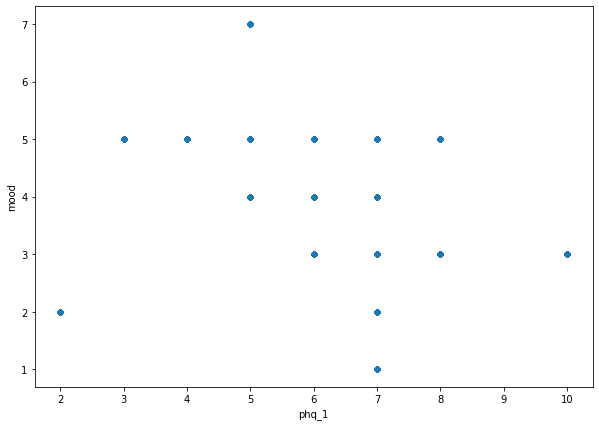

In [40]:
patient.plot(kind='scatter', x='phq_1', y='mood', figsize=(10,7))

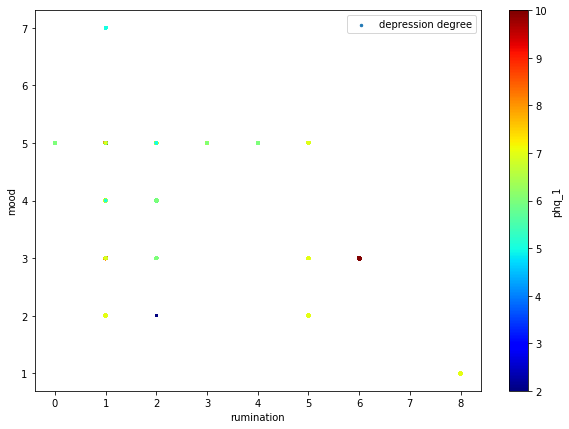

In [47]:
from matplotlib import pyplot

patient.plot(kind='scatter', x='rumination', y='mood', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

In [1]:
patient.plot(kind='scatter', x='mood', y='tense', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

NameError: name 'patient' is not defined

In [42]:
corr_matrix = patient.corr()

In [43]:
corr_matrix['phq_1'].sort_values(ascending=False)

phq_1                 1.000000
phq_2                 0.817956
day_sleep             0.485926
rumination            0.320948
ple_std               0.033815
heartR                0.028215
accY                  0.024016
accX                  0.013576
accZ                  0.011121
tired                 0.007712
gyrZ                 -0.000519
gyrY                 -0.002304
gyrX                 -0.012411
heartR_std           -0.013235
AT_std               -0.017121
PlethysmogramGreen   -0.038647
gyrZ_std             -0.039823
gyrY_std             -0.051236
accZ_std             -0.051398
accY_std             -0.051398
accX_std             -0.056919
gyrX_std             -0.066429
AirTemperature       -0.088989
time                 -0.152428
work_time            -0.214736
socialize            -0.230553
socialize_val        -0.382035
tense                -0.434791
mood                 -0.444494
Name: phq_1, dtype: float64

In [49]:
socialise_scaled = scaler_st.fit_transform(test_set_st[['socialize']])
socialize_val_scaled = scaler_st.fit_transform(test_set_st[['socialize_val']])
work_time_scaled = scaler_st.fit_transform(test_set_st[['work_time']])
mood_scaled = scaler_st.fit_transform(test_set_st[['mood']])
tense_scaled = scaler_st.fit_transform(test_set_st[['tense']])
rumination_scaled = scaler_st.fit_transform(test_set_st[['rumination']])

In [50]:
time_sorted = time_st_test
time_sorted.sort()

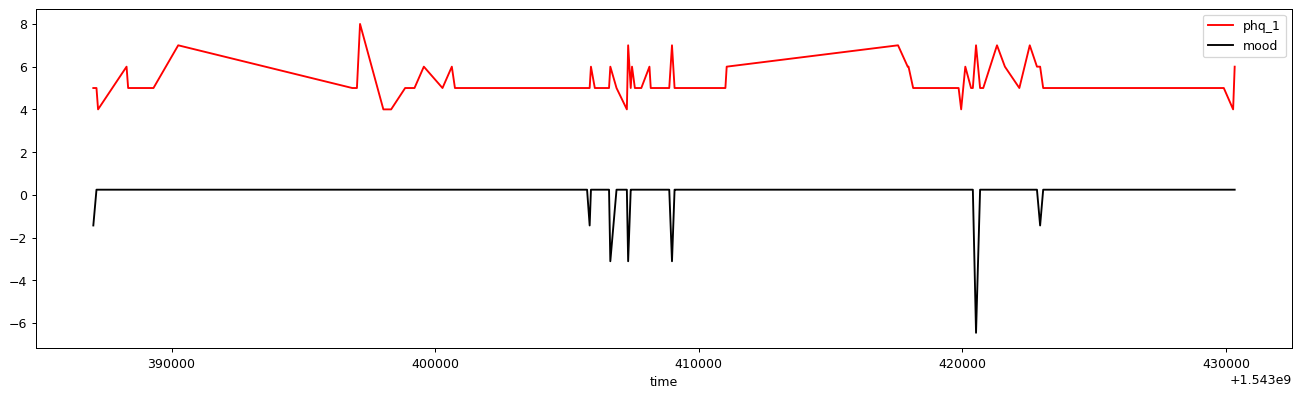

In [54]:
%matplotlib inline
s = 1100
e = 1200
xaxis = time_sorted[s:e]
yaxis = y_test_st_1[s:e]
yaxis2 = pred_test_st[s:e]
yaxis3 = socialise_scaled[s:e]
yaxis4 = socialize_val_scaled[s:e]
yaxis5 = work_time_scaled[s:e]
yaxis6 = mood_scaled[s:e]
yaxis7 = tense_scaled[s:e]
yaxis8 = rumination_scaled[s:e]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
# pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
# pyplot.plot(xaxis, yaxis3, color='green', label='socialize')
# pyplot.plot(xaxis, yaxis4, color='cyan', label='socialize_val')
# pyplot.plot(xaxis, yaxis5, color='magenta', label='sport_time')
pyplot.plot(xaxis, yaxis6, color='black', label='mood')
# pyplot.plot(xaxis, yaxis7, color='blue', label='tense')
# pyplot.plot(xaxis, yaxis8, color='blue', label='rumination')
# plt.ylabel('some numbers')
pyplot.xlabel('time')

pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

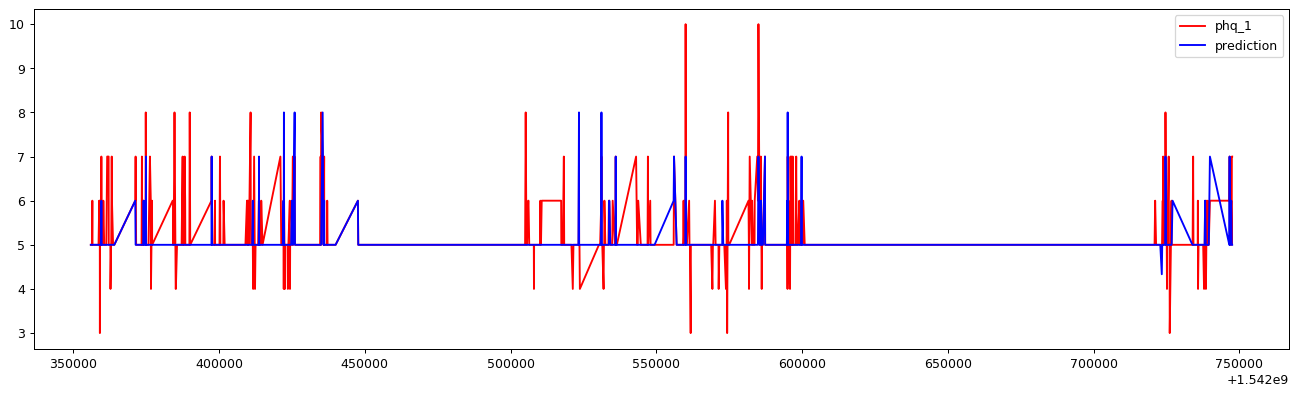

In [57]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_st_test[:500]
yaxis = y_test_st_1[:500]
yaxis2 = pred_test_st[:500]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')